In [1]:
!pip install xgboost

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [13]:
import pandas as pd
from xgboost import XGBClassifier
from sklearn.model_selection import KFold, GridSearchCV,cross_val_score,StratifiedKFold
from sklearn.model_selection import train_test_split
from catboost import CatBoostClassifier
import matplotlib.pyplot as plt
import numpy as np
from sklearn import tree
from sklearn.metrics import accuracy_score, roc_auc_score, log_loss

### BANKRUPTCY

In [3]:
 brupt=pd.read_csv("/Bankruptcy1.csv")
 x=brupt.drop(['NO','D'],axis=1)
 y=brupt['D']

In [4]:
xgb=XGBClassifier(random_state=2023)
params={'learning_rate':[0.1,0.15,0.3,0.35,0.4,0.5],'n_estimators':[25,50,75],'max_depth':[2,3,4,5]}
kfold = StratifiedKFold(n_splits=5, shuffle=True, random_state=2023)
gcv=GridSearchCV(xgb, param_grid=params, cv=kfold, scoring='roc_auc')
gcv.fit(x,y)
print(gcv.best_params_) #{'learning_rate': 0.5, 'max_depth': 5, 'n_estimators': 25}
print(gcv.best_score_)  # 0.8895181741335587




{'learning_rate': 0.5, 'max_depth': 5, 'n_estimators': 25}
0.8895181741335587


[0.00941411 0.00890836 0.01461338 0.00960214 0.00580563 0.01000039
 0.         0.01445006 0.01149407 0.06398384 0.03122382 0.02267579
 0.02068326 0.01886917 0.01715743 0.14546525 0.01425938 0.01929173
 0.00408708 0.01030991 0.03038843 0.047854   0.00642372 0.04438562
 0.41865346]
Index(['YR', 'R1', 'R2', 'R3', 'R4', 'R5', 'R6', 'R7', 'R8', 'R9', 'R10',
       'R11', 'R12', 'R13', 'R14', 'R15', 'R16', 'R17', 'R18', 'R19', 'R20',
       'R21', 'R22', 'R23', 'R24'],
      dtype='object')


<Figure size 2160x1080 with 0 Axes>

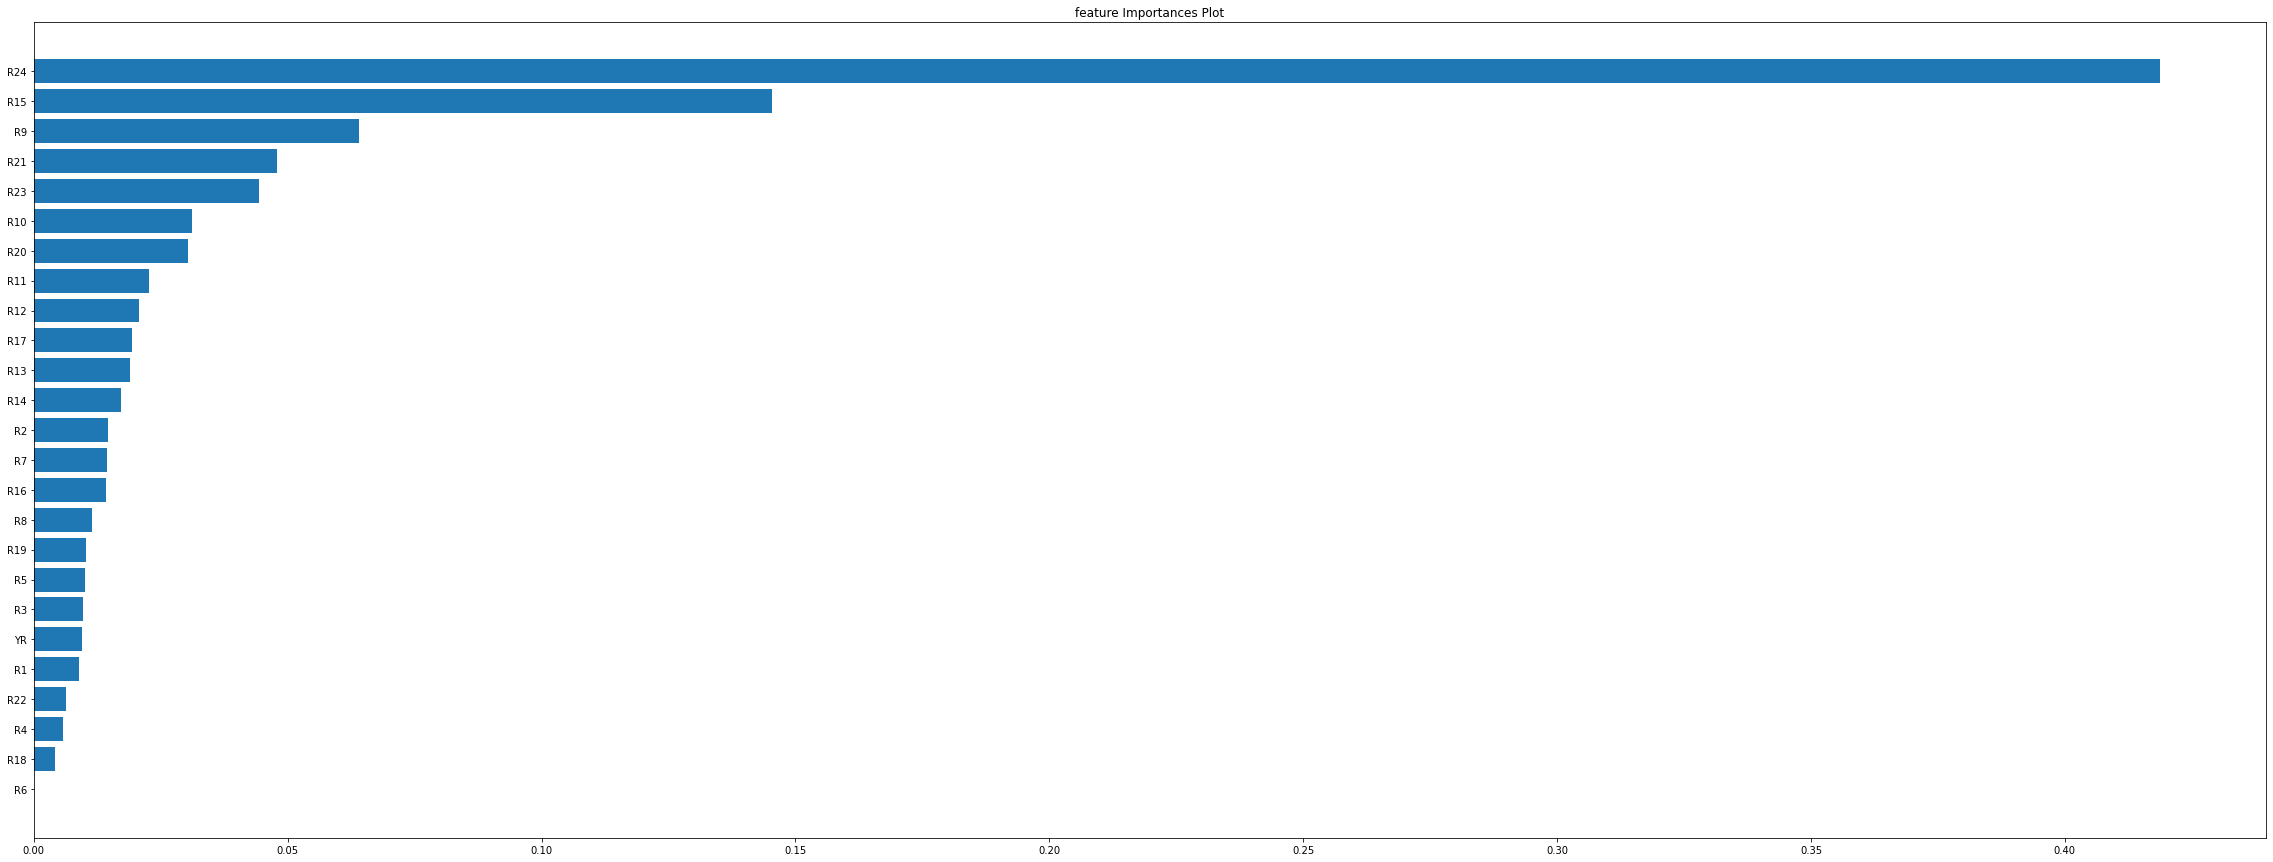

In [6]:
best_model = gcv.best_estimator_
plt.figure(figsize=(30, 15))
print(best_model.feature_importances_)
print(x.columns)
imps = best_model.feature_importances_
cols = x.columns

plt.figure(figsize=(40, 15))
s_index=np.argsort(imps)
sorted_imps=imps[s_index]
sorted_x=cols[s_index]
plt.barh(sorted_x, sorted_imps)
plt.title("feature Importances Plot")
plt.show()


## CAT BOOST

In [10]:
!pip install catboost

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


########## Bank RUPTCY WITH CAT BOOST

In [12]:
 brupt=pd.read_csv("/Bankruptcy1.csv")
 x=brupt.drop(['NO','D'],axis=1)
 y=brupt['D']

In [15]:
cat=CatBoostClassifier(random_state=2023)
params={'learning_rate':[0.1,0.15,0.3,0.35,0.4,0.5],'n_estimators':[25,50,75],'max_depth':[2,3,4,5]}
kfold = StratifiedKFold(n_splits=5, shuffle=True, random_state=2023)
gcv=GridSearchCV(cat, param_grid=params, cv=kfold, scoring='roc_auc')
gcv.fit(x,y)
print(gcv.best_params_) #{'learning_rate': 0.1, 'max_depth': 4, 'n_estimators': 25}
print(gcv.best_score_) #0.9104818258664412

Streaming output truncated to the last 5000 lines.
2:	learn: 0.3463681	total: 3.3ms	remaining: 51.7ms
3:	learn: 0.3315906	total: 4.39ms	remaining: 50.5ms
4:	learn: 0.3001872	total: 5.56ms	remaining: 50.1ms
5:	learn: 0.2655011	total: 6.63ms	remaining: 48.6ms
6:	learn: 0.2487356	total: 8ms	remaining: 49.1ms
7:	learn: 0.2382382	total: 8.81ms	remaining: 46.3ms
8:	learn: 0.2013170	total: 9.65ms	remaining: 43.9ms
9:	learn: 0.1885429	total: 10.5ms	remaining: 41.9ms
10:	learn: 0.1627817	total: 11.4ms	remaining: 40.4ms
11:	learn: 0.1591244	total: 12.2ms	remaining: 38.5ms
12:	learn: 0.1521871	total: 13ms	remaining: 36.9ms
13:	learn: 0.1477107	total: 13.9ms	remaining: 35.6ms
14:	learn: 0.1327378	total: 14.6ms	remaining: 34.2ms
15:	learn: 0.1261487	total: 15.3ms	remaining: 32.5ms
16:	learn: 0.1139720	total: 16ms	remaining: 31ms
17:	learn: 0.0981042	total: 16.7ms	remaining: 29.6ms
18:	learn: 0.0946603	total: 17.4ms	remaining: 28.3ms
19:	learn: 0.0839790	total: 18.2ms	remaining: 27.3ms
20:	learn: 0.

<Figure size 2160x1080 with 0 Axes>

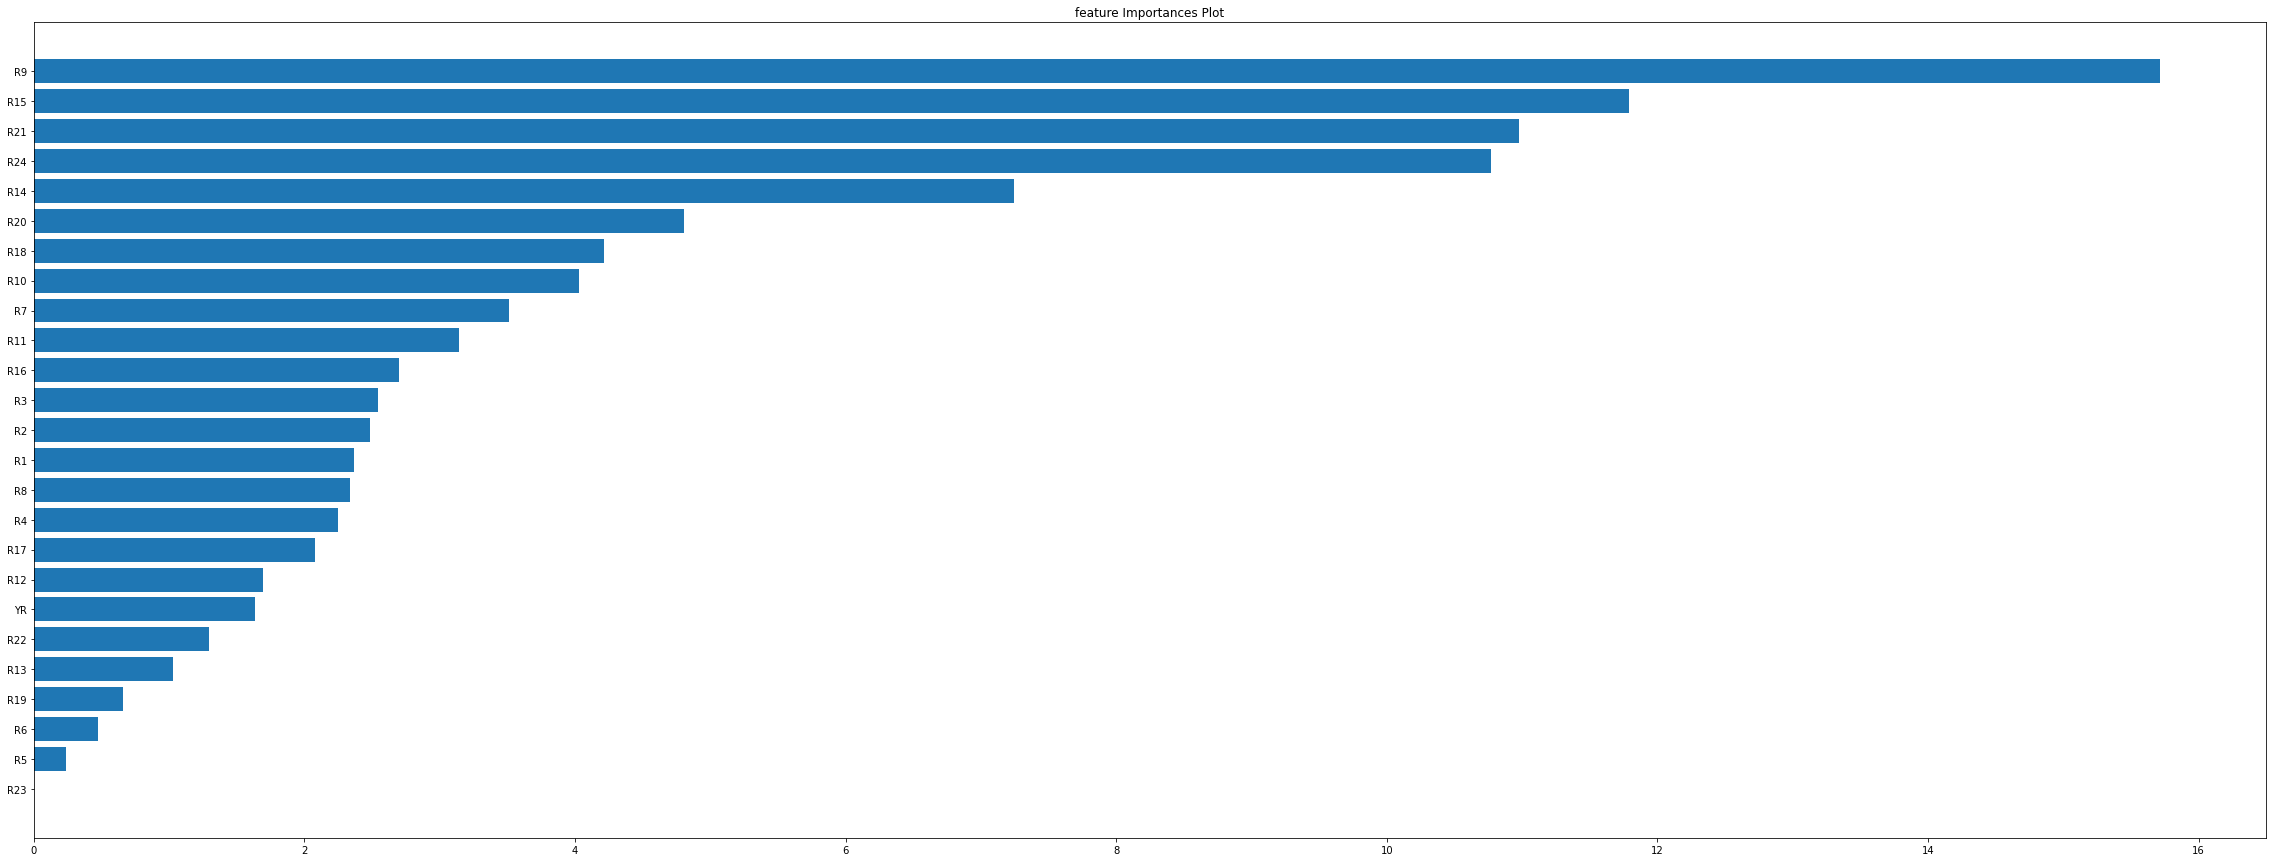

In [16]:
best_model = gcv.best_estimator_
plt.figure(figsize=(30, 15))
#print(best_model.feature_importances_)
#print(x.columns)
imps = best_model.feature_importances_
cols = x.columns

plt.figure(figsize=(40, 15))
s_index=np.argsort(imps)
sorted_imps=imps[s_index]
sorted_x=cols[s_index]
plt.barh(sorted_x, sorted_imps)
plt.title("feature Importances Plot")
plt.show()